In [1]:
cd C:\Users\Carleton\Desktop\GeneralAssembly\CodeChallenge

C:\Users\Carleton\Desktop\GeneralAssembly\CodeChallenge


### Section 1: Modeling: Perform standard data science tasks in Python

**Import packages**

In [68]:
# import packages
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline

**Load the data and header. Then attach header to df**

In [24]:
headerFile = pd.read_table("field_names.txt",delimiter='\n',index_col=None,header=None) # read header
headerList = headerFile.values.flatten() # create list of column headers

In [53]:
data = pd.read_csv("breast-cancer.csv", names=headerList) # read data and attach header
data.head()

,ID,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [29]:
data.describe(include = 'all')

,ID,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
count,5.690000e+02,569,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3.037183e+07,NaN,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,NaN,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,NaN,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,NaN,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,NaN,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,NaN,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080


In [48]:
# check for missing values
colWithMissingVals = []
for col in np.arange(data.shape[1]):
    if data[data.iloc[:,col].isnull()].shape[0] > 0:
        colWithMissingVals.append(headerList[col])
print colWithMissingVals

[]


In [75]:
# separate data from target
data_records = data.iloc[:,2:]
data_target = data.iloc[:,0:2]

In [87]:
# normalize columns
min_max_scaler = preprocessing.MinMaxScaler().fit(data_records)
data_records_scaled = min_max_scaler.transform(data_records)
data_records_norm = pd.DataFrame(data_records_scaled,columns = headerList[2:])

In [89]:
data_records_norm.head()

,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,area_mean,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


**Comment on any steps you might take to evaluate or transform the dataset**

The features are all numerical, but need to be normalized so they are can be analyzed on the same scale. If this is not done, features with larger numbers will carry a larger weight simply because the measurements are in taken in a larger scale.

Additionally, the data should be checked for missing values. If values are missing, these should be dealt with through interpolation or removal.

The features should also be evaluated for outliers. If outliers are present and likely caused by noise, they should be removed.

**Compute the mean and median smoothness and compactness for benign and malignant tumors - do they differ? Explain how you would identify this**

In [98]:
# concatenate the data with target
data_norm = pd.concat([data_target,data_records_norm],axis=1)

In [100]:
smoothness_mean_benign = data_norm[data_norm['diagnosis'] == 'B'].smoothness_mean.mean()
smoothness_mean_malignant = data_norm[data_norm['diagnosis'] == 'M'].smoothness_mean.mean()
compactness_mean_benign = data_norm[data_norm['diagnosis'] == 'B'].compactness_mean.mean()
companctness_mean_malignant = data_norm[data_norm['diagnosis'] == 'M'].compactness_mean.mean()

In [101]:
smoothness_median_benign = data_norm[data_norm.diagnosis == 'B'].smoothness_mean.median()
smoothness_median_malignant = data_norm[data_norm.diagnosis == 'M'].smoothness_mean.median()
compactness_median_benign = data_norm[data_norm.diagnosis == 'B'].compactness_mean.median()
companctness_median_malignant = data_norm[data_norm.diagnosis == 'M'].compactness_mean.median()

In [102]:
print "Smoothness Mean - Benign: ",smoothness_mean_benign
print "Smoothness Mean - Malignant: ",smoothness_mean_malignant
print "Compactness Mean- Benign: ",compactness_mean_benign
print "Compactness Mean - Malignant: ",companctness_mean_malignant

Smoothness Mean - Benign:  0.0585836728321
Smoothness Mean - Malignant:  0.168069040441
Compactness Mean- Benign:  0.144097143769
Compactness Mean - Malignant:  0.225532228004


In [103]:
print "Smoothness Median - Benign: ",smoothness_median_benign
print "Smoothness Median - Malignant: ",smoothness_median_malignant
print "Compactness Median - Benign: ",compactness_median_benign
print "Compactness Median - Malignant: ",companctness_median_malignant

Smoothness Median - Benign:  0.0515478490317
Smoothness Median - Malignant:  0.137704377326
Compactness Median - Benign:  0.105581758645
Compactness Median - Malignant:  0.197809955839


In [104]:
from scipy.stats import ttest_ind

In [108]:
benign_Data = data_norm[data_norm['diagnosis']=='B']
malignant_Data = data_norm[data_norm['diagnosis']=='M']

In [109]:
print ttest_ind(benign_Data['smoothness_mean'], malignant_Data['smoothness_mean'])

Ttest_indResult(statistic=-15.934158019257904, pvalue=1.651905175849735e-47)


In [110]:
print ttest_ind(benign_Data['compactness_mean'], malignant_Data['compactness_mean'])

Ttest_indResult(statistic=-7.2970774374485252, pvalue=9.9759946540749462e-13)


Yes, the statistics for smoothness and compactness means differ. This is confirmed with a t-test that shows the distributions are statistically different based on the null hypothesis that they are pulled from the same distribution.

**Write a function to generate bootstrap samples of the data**

In [228]:
def bootstrapper(df,N,num_iterations,statistic = 'mean'):
    # df: pandas DF containing data
    # N: the sample size to be taken each iteration
    # num_iterations: number of bootstrap samples to take
    # statistic: the statistic to measure, either 'mean' or 'standard_deviation'
    
    # Returns two numpy arrays containing all the samples and their statistics
    
    num_cols = df.shape[1]
    
    dtype = [('sampleSet',np.float64,[N,num_cols]),('statistic',np.float64,[1,num_cols])]
    sampleArrays = np.zeros(num_iterations,dtype=dtype)
    stats = np.zeros(num_iterations,dtype=dtype)
    
    if statistic == 'mean':
        for samp in np.arange(num_iterations):
            curr_Sample = df.sample(N)
            sampleArrays[samp]['sampleSet'] = curr_Sample
            stats[samp]['statistic'] = curr_Sample.mean()
    elif statistic == 'standard_deviation':
        for samp in np.arange(num_iterations):
            curr_Sample = df.sample(N)
            sampleArrays[samp]['sampleSet'] = curr_Sample
            stats[samp]['statistic'] = curr_Sample.std()
    else:
        print "Invalid Input for 'Statistic'"
    return sampleArrays,
    

In [229]:
bootstrappedArr = bootstrapper(data_norm.iloc[:,2:],50,5,'mean')

In [233]:
bootstrappedArr[0]['sampleSet'][4]

array([[ 0.27161721,  0.1376395 ,  0.26252505, ...,  0.21797251,
         0.1584861 ,  0.093008  ],
       [ 0.21434995,  0.4808928 ,  0.21235575, ...,  0.33171821,
         0.10782574,  0.21172767],
       [ 0.21056368,  0.25701725,  0.20641283, ...,  0.22      ,
         0.20086734,  0.17001181],
       ..., 
       [ 0.30238061,  0.22590463,  0.29237786, ...,  0.30852234,
         0.09520993,  0.13931523],
       [ 0.53192295,  0.30977342,  0.517656  , ...,  0.61030928,
         0.24581116,  0.17670209],
       [ 0.55038099,  0.35644234,  0.54115127, ...,  0.51202749,
         0.15296669,  0.1257379 ]])

**Exploratory Analysis: Identify 2-3 variables that are predictive of a malignant tumor.
Display the relationship visually and write 1-2 sentences explaining the relationship.**

In [257]:
from sklearn import feature_selection

In [330]:
# select top 10 percentile of features based on ANOVA F-value (~3 features)
fs = feature_selection.SelectKBest(feature_selection.chi2,k=3)
X_train_fs = fs.fit_transform(data_norm[headerList[2:]],data_norm[headerList[1]])

In [331]:
print fs.get_support()

[False False False False False False  True  True False False False False
 False False False False False False False False False False False False
 False False False  True False False]


In [332]:
print fs.scores_

[  2.48972929e+01   6.39407141e+00   2.65289023e+01   2.93285938e+01
   2.98190040e+00   2.03531759e+01   4.61863954e+01   5.24057427e+01
   3.13313039e+00   7.65553154e-03   1.73241278e+01   3.07449233e-03
   1.60443442e+01   1.96769750e+01   1.46728955e-01   5.05676231e+00
   2.63817579e+00   5.78199590e+00   1.83480200e-03   2.88033633e-01
   3.41249366e+01   8.74162754e+00   3.44380907e+01   3.50438820e+01
   5.67573303e+00   2.09925414e+01   3.15630312e+01   4.63416477e+01
   5.56009310e+00   4.41012524e+00]


In [335]:
# print the columns with the highest scores
feat_names = data_norm.columns[2:][fs.get_support()].values
print feat_names

['perimeter_mean' 'perimeter_sd_error' 'fractal_dimension_mean']


In [336]:
for i in range(len(data_norm.columns[2:].values)):
    if fs.get_support()[i]:
        print data_norm.columns[2:].values[i],'\t',fs.scores_[i]

perimeter_mean 	46.1863953908
perimeter_sd_error 	52.4057426866
fractal_dimension_mean 	46.3416476935


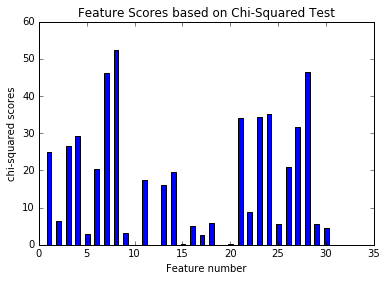

In [338]:
X_indices = np.arange(data_norm.shape[-1]-2)
plt.figure(1)
plt.clf()
plt.bar(X_indices+.8,fs.scores_, width = .5)
plt.title("Feature Scores based on Chi-Squared Test")
plt.xlabel('Feature number')
plt.ylabel('chi-squared scores')
plt.show()

The three best features were perimeter_mean, perimeter_sd_error, and fractal_dimension_mean. These features were evaluated with a univariate feature selection method. This method selected the 3 best features based on a univariate statistical test, chi-squared. This method weeds out the features that are most likely to be independent of the target variable.

**Modeling: Build a model to predict the malignant tumors.**
- Use at least two classification techniques; compare and contrast the advantages and disadvantages of each.
- Identify how you would control for overfitting in each classification technique.
- Evaluate the performance of each model.
- In each model, identify the most important predictive variables and explain how you identified them.

- Use at least two classification techniques; compare and contrast the advantages and disadvantages of each.
Below are a decision tree and a support vector machine classifiers.

Pros of Decision Tree:
The decision tree is easy to implement and interpret. It can be used on large datasets with nominal and numeric data. The DT can provide insight into important features. Furthermore, not much preprocessing is required.

Cons of Decision Tree:
The Decision tree is sensitive to changes in the training data. A small change can produce a large effect on the results. It is also a weak learner, meaning it is frequently outperformed by other classifiers. Perhaps the biggest danger is that the decision tree is prone to overfitting. Parameters must be implemented to prevent this.

Pros of SVM:
Highly accurate. SVMs are capable of performing linear and non-linear classification tasks. They tend to generalize well and easy to interpret.

Cons of SVM:
SVMs are not suited particularly well on large datasets. Furthermore, SVMs are sensitive to tuning parameters and kernel choice. Lastly, SVM can only handle binary classification, unless used in an ensemble.

- Identify how you would control for overfitting in each classification technique.
The Decision tree used a combination of feature selection using chi-squared statistical test and an iterative selection process to determin the value for max-depth, min leaf size, and min number of samples for a split.

The SVM used a soft margin (C=1) to reduce the effect of outliers. For the most part, SVMs generalize well when parameters are accurate.

- Evaluate the performance of each model.

See below.

- In each model, identify the most important predictive variables and explain how you identified them.

Decision Tree:
The features selection process identified three features as most important. These were perimeter_mean, perimeter_sd_error, and fractal_dimension_mean. The process used to identify these features was a chi-squared test measuring the independence of each variable with the target. Features will high independence were removed.

SVM:
The support vector machine was able to find a hyperplane that linearly separated the classes well. No particular features were used more than others.

### MODEL 1: DECISION TREE

In [ ]:
from sklearn.cross_validation import train_test_split
from sklearn import tree
from sklearn import metrics
from sklearn.tree import export_graphviz

Create function to evaluate model

In [350]:
def measure_performance(X,y,clf,show_accuracy=True,show_classification_report=True,show_confusion_matrix=True):
    y_pred = clf.predict(X)
    if show_accuracy:
        print "Accuracy: {0:.3f}".format(metrics.accuracy_score(y,y_pred)),"\n"
    if show_classification_report:
        print "Classification Report"
        print metrics.classification_report(y,y_pred),"\n"
    if show_confusion_matrix:
        print "Confusion Matrix"
        print metrics.confusion_matrix(y,y_pred),"\n"

In [346]:
# separate target from data
X = data_norm[headerList[2:]]
y = data_norm['diagnosis']

In [394]:
# separate into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33)

In [373]:
# select features again
fs = feature_selection.SelectKBest(feature_selection.chi2,k=3)
X_train_fs = fs.fit_transform(X_train,y_train)

In [374]:
for i in range(len(data_norm.columns[2:].values)):
    if fs.get_support()[i]:
        print data_norm.columns[2:].values[i],'\t',fs.scores_[i]

perimeter_mean 	28.9490447936
perimeter_sd_error 	34.5426299829
fractal_dimension_mean 	29.8973091718


In [376]:
# performance on testing
dt = tree.DecisionTreeClassifier(criterion='entropy')
dt.fit(X_train_fs,y_train)
X_test_fs = fs.transform(X_test)
measure_performance(X_test_fs,y_test,dt)

Accuracy: 0.904 

Classification Report
             precision    recall  f1-score   support

          B       0.90      0.94      0.92       111
          M       0.90      0.86      0.88        77

avg / total       0.90      0.90      0.90       188


Confusion Matrix
[[104   7]
 [ 11  66]] 



In [378]:
# performance on training
measure_performance(X_train_fs,y_train,dt)

Accuracy: 1.000 

Classification Report
             precision    recall  f1-score   support

          B       1.00      1.00      1.00       246
          M       1.00      1.00      1.00       135

avg / total       1.00      1.00      1.00       381


Confusion Matrix
[[246   0]
 [  0 135]] 



In [ ]:
export_graphviz(dt,out_file='featSelectTree.dot',feature_names=feat_names,class_names = ['M','B'],rounded=True,filled=True)

** run this code in command prompt to visualize tree:
dot -Tpng featSelectTree.dot -o featSelectTree.png**

In [381]:
from sklearn.cross_validation import KFold

In [382]:
# Find ideal parameters
def calc_params(X, y, clf, param_values, param_name, K):
    
    # Convert input to Numpy arrays
    X = np.array(X)
    y = np.array(y)

    # initialize training and testing scores with zeros
    train_scores = np.zeros(len(param_values))
    test_scores = np.zeros(len(param_values))
    
    # iterate over the different parameter values
    for i, param_value in enumerate(param_values):
        print param_name, ' = ', param_value
        
        # set classifier parameters
        clf.set_params(**{param_name:param_value})
        
        # initialize the K scores obtained for each fold
        k_train_scores = np.zeros(K)
        k_test_scores = np.zeros(K)
        
        # create KFold cross validation
        cv = KFold(len(X), K, shuffle=True, random_state=0)
        
        # iterate over the K folds
        for j, (train, test) in enumerate(cv):
            # fit the classifier in the corresponding fold
            # and obtain the corresponding accuracy scores on train and test sets
            clf.fit([X[k] for k in train], y[train])
            k_train_scores[j] = clf.score([X[k] for k in train], y[train])
            k_test_scores[j] = clf.score([X[k] for k in test], y[test])
            
        # store the mean of the K fold scores
        train_scores[i] = np.mean(k_train_scores)
        test_scores[i] = np.mean(k_test_scores)
       
    # plot the training and testing scores in a log scale
    plt.plot(param_values, train_scores, label='Train', alpha=0.4, lw=2, c='b')
    plt.plot(param_values, test_scores, label='X-Val', alpha=0.4, lw=2, c='g')
    plt.legend(loc=7)
    plt.xlabel(param_name + " values")
    plt.ylabel("Mean cross validation accuracy")

    # return the training and testing scores on each parameter value
    return train_scores, test_scores

In [383]:
# find the best max-depth
md = np.linspace(1,40,20)
md = np.array([int(e) for e in md])
print md

[ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 40]


max_depth  =  1
max_depth  =  3
max_depth  =  5
max_depth  =  7
max_depth  =  9
max_depth  =  11
max_depth  =  13
max_depth  =  15
max_depth  =  17
max_depth  =  19
max_depth  =  21
max_depth  =  23
max_depth  =  25
max_depth  =  27
max_depth  =  29
max_depth  =  31
max_depth  =  33
max_depth  =  35
max_depth  =  37
max_depth  =  40


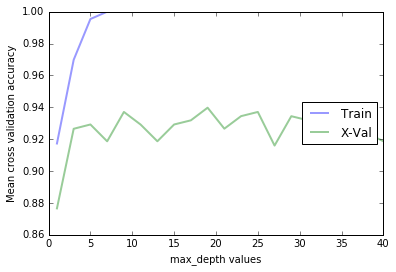

In [385]:
train_scores, test_scores = calc_params(X_train,y_train,dt,md,"max_depth",5)

max_depth = 3 works best.

min_samples_leaf  =  1
min_samples_leaf  =  3
min_samples_leaf  =  5
min_samples_leaf  =  7
min_samples_leaf  =  9
min_samples_leaf  =  11
min_samples_leaf  =  13
min_samples_leaf  =  15
min_samples_leaf  =  17
min_samples_leaf  =  19
min_samples_leaf  =  21
min_samples_leaf  =  23
min_samples_leaf  =  25
min_samples_leaf  =  27
min_samples_leaf  =  30


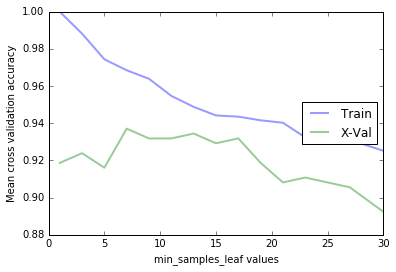

In [386]:
msl = np.linspace(1, 30, 15)
msl = np.array([int(e) for e in msl])

dt = tree.DecisionTreeClassifier(criterion='entropy')
train_scores, test_scores = calc_params(X_train, y_train, dt, msl, 'min_samples_leaf', 5)

min samples = 7 seem best

min_samples_split  =  1
min_samples_split  =  3
min_samples_split  =  5
min_samples_split  =  7
min_samples_split  =  9
min_samples_split  =  11
min_samples_split  =  13
min_samples_split  =  15
min_samples_split  =  17
min_samples_split  =  19
min_samples_split  =  21
min_samples_split  =  23
min_samples_split  =  25
min_samples_split  =  27
min_samples_split  =  30


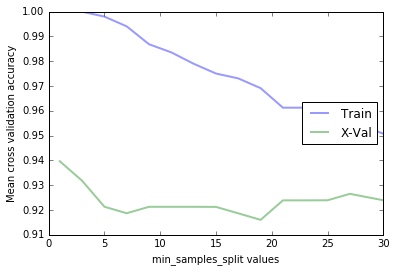

In [387]:
mss = np.linspace(1, 30, 15)
mss = np.array([int(e) for e in mss])

dt = tree.DecisionTreeClassifier(criterion='entropy')
train_scores, test_scores = calc_params(X_train, y_train, dt, mss, 'min_samples_split', 5)

min samples for split = 1

In [388]:
dt = tree.DecisionTreeClassifier(criterion='entropy',max_depth = 3,min_samples_split =1,min_samples_leaf=7,)
dt.fit(X_train_fs,y_train)
measure_performance(X_test_fs,y_test,dt)

Accuracy: 0.915 

Classification Report
             precision    recall  f1-score   support

          B       0.93      0.93      0.93       111
          M       0.90      0.90      0.90        77

avg / total       0.91      0.91      0.91       188


Confusion Matrix
[[103   8]
 [  8  69]] 



### MODEL 2: Support Vector Machine

In [389]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [390]:
svm_clf = Pipeline((("scaler",StandardScaler()),("linear_svc",LinearSVC(C=1,loss='hinge')),))

In [391]:
svm_clf.fit(X_train,y_train)

Pipeline(steps=(('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))))

In [397]:
# performance on training
measure_performance(X_train,y_train,svm_clf)

Accuracy: 0.990 

Classification Report
             precision    recall  f1-score   support

          B       0.98      1.00      0.99       245
          M       1.00      0.97      0.99       136

avg / total       0.99      0.99      0.99       381


Confusion Matrix
[[245   0]
 [  4 132]] 



In [398]:
# performance on testing
measure_performance(X_test,y_test,svm_clf)

Accuracy: 0.984 

Classification Report
             precision    recall  f1-score   support

          B       0.98      0.99      0.99       112
          M       0.99      0.97      0.98        76

avg / total       0.98      0.98      0.98       188


Confusion Matrix
[[111   1]
 [  2  74]] 



In [399]:
svm_clf.named_steps

{'linear_svc': LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
      intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
      penalty='l2', random_state=None, tol=0.0001, verbose=0),
 'scaler': StandardScaler(copy=True, with_mean=True, with_std=True)}

### Explanation

**To Technical Audiences: Explain the limitations of your analysis and identify possible further steps you could take.**

Only two classifier models were explored. An ensemble approach would be worth evaluating, such as randomForest or Adaboost. In the decision tree, a more robust parameter evaluation should take place. Dimension reduction should take place to reduce the feature space. PCA will produce new components that capture a majority of the variance in the data.

In the support vector machine, a weight should be given to the malignant cases, as the cost of a false negative far outweighs the cost of a false positive. Kernel methods should be investigated.

In both cases, the results should be validated with 10-Fold Cross validation. The smaller dataset should be prone to sampling error.

**To Non-Technical Audiences:**

**Write a short summary of your analysis, explaining how your model works and how it performs.**
The analysis begins with exploring the data. The data contains information about breast cancer cells. The goal of the analysis is to identify cases that are "malignant" or "benign" based on the measurements.

After verifying the data was complete and usable, the objective shifted to identifying important measurements in determining malignant and benign cases. The analysis statistically measured the importance of each measurement in relation the to target variable and found three meaurements to be most important: perimeter_mean, perimeter_sd_error, and fractal_dimension_mean.

These features were used in a Decision tree to make predictions. Decision trees learn rules for separating the cases based on values from the data. The decision tree achieved 91.5% accuracy on test data.

The next model is a support vector machine. This model finds the best "line" or hyperplane that separates the classes. To do this the data must be transformed so that the scale of the features does not affect the results. A cost function, called the "hinge", is optimized with a technique called gradient decent. This contributes to the speed and accuracy of the model. The SVM achieved 98.4% accuracy on testing.

**Briefly explain the factors that contributed to malignant vs benign tumor identification.**
The factors that contributed to malignant and benign tumor identification were a clean and complete dataset, the three most significant features (perimeter_mean, perimeter_sd_error, and fractal_dimension_mean), and the proper use of classification algorithms with optimization strategies. In this case, predicting malignant and benign tumors was made much easier due to the good data. It is often the case that a simple algorithm with good data will out perform a complex model with bad data.

## Part 2: Code Debugging

** Student Sample 1 **

In [ ]:
#!/usr/bin/env python

import pandas as pd
import numpy as np
from sklearn import LinearRegression # from sklearn import linear_model
from sklearn.cross_validation import cross_val_score

# Load data
d = pd.read_csv('../data/train.csv') # In general, you'll want to name this something more descriptive, like "employeeData"




# Setup data for prediction
x1 = data.SalaryNormalized  # When you read in the data, you called it "d". Use that in place of 'Data'
x2 = pd.get_dummies(data.ContractType) # correct!

# Setup model
model = LinearRegression()

# Evaluate model
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split
scores = cross_val_score(model, x2, x1, cv=1, scoring='mean_absolute_error')
print(scores.mean())


In [ ]:
cd C:\Users\Carleton\Desktop\GeneralAssembly\CodeChallenge

In [ ]:
# Feedback:

import numpy as np
import pandas as pd
from sklearn import linear_model

# cd C:\Users\Carleton\Desktop\GeneralAssembly\CodeChallenge - put this line in a cell by itself.

part2Data = pd.read_csv('filename.csv') # 'filename' is the name of the folder. Now that the cd is set, you don't need to add the
                                        # full path of the file. The computer searches the files within the cd folder

    
# first, look at the data. This can be done with the head() method in pandas
part2Data.head()

# then use groupby() to evaluate the features
part2Data.groupby("ContractTime").mean()

# extract column headers
col_names = part2Data.columns.values

# create dummies for all categorical features
new_data = pd.get_dummies(part2Data[col_names[1:]]) # excluding the id column. Indexing is crucial

Feedback:

I think what you first need to master is how to navigate documentation. It can be daunting at first, but once you learn how the documenation is organized, it is extremely helpful.

Most of what you need now is help with manipulating data. I wouldn't worry about the models just yet, because the results will be poor if the data is bad. A good resource that helped me when I was starting was "PYTHON FOR DATA ANALYSIS" by WEs McKinney. He goes into the details of Numpy and Pandas. I think it will be helpful.

I think you conceptually know the process: read data, preprocess, decide which features and models, the adjust accordingly. You will also need a training and test set to validate your results.

Remember to first try to visualize the data first. It always helps me to use the .head() methond with pandas. From there you can use .describe() to look at numeric data and .groupby to aggregate the categorical variables. This is a big step. Keep at it!

** Student Sample 2**

In [ ]:
#!/usr/bin/env python

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score

# Load data
data = pd.read_csv('../data/train.csv')


# Setup data for prediction
y = data.SalaryNormalized
X = pd.get_dummies(data.ContractType)

# Setup model
model = LinearRegression()

# Evaluate model
scores = cross_val_score(model, X, y, cv=5, scoring='mean_absolute_error')
print(scores.mean())

Feedback:

Your style is very clean, keep that up. I find it easier to visualize the data first before jumping into preprocessing. Try using pd.data.describe() and .head() methods. Remember, here are the steps:

1. Understand the data
2. Clean and preprocess
    - create dummy variables for categorical variables
    - deal with missing values
    - identify outliers
    - normalize numeric values
    -create training and testing sets
3. feature selection/dimensionality reduction
4. model building
5. validation

Once you have a model, also consider what those scores mean. What do the weights tell you?